# **Kmeans Clustering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
import random
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial.distance import cdist

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



No handles with labels found to put in legend.


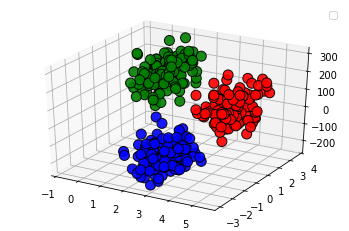

In [2]:
color = []     
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
for i in y_true:
  if i == 0:
    color.append('red')
  elif i == 1:
    color.append('green')
  else:
    color.append('blue')
global grafico #figure
def scatter_plot(x,y,z,c,m):
    grafico.scatter(x,y,z,color=c, edgecolors='k',s=100, alpha=0.9, marker=m)
    return 
Z = X[:,0] + 80 * X[:,1]
grafico = plt.figure().gca(projection='3d')  #new figure
scatter_plot(X[:, 0], X[:, 1], Z,c=color,m='o')
plt.legend()
plt.show()

# **Kmeans:**
K-means Clustering algorithm is popular unsupervised machine learning algorithms, that solve the well-known clustering problem \(Clustering is a type of unsupervised learning which is used to segregate unlabeled data into different groups.), with no pre-determined labels defined, meaning that we don’t have any target variable as in the case of supervised learning. It is often referred to as Lloyd’s algorithm.

**K refers to the total number of clusters to be defined in the entire dataset**

The K-means clustering algorithm, tries to find out K number of centroids, and then allocates every data point to the nearest cluster. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

The Algorithm::

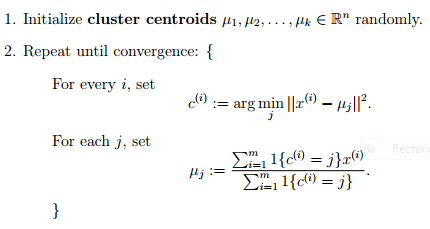


**Step1:** Randomly initialize the cluster centers of each cluster from the data points.

**Step2:** For each dataset point, compute the euclidian distance from 
all the centroids and assign the cluster to it's nearest centroid.

**Step3:** Recompute centroids,by taking the average of all the data points which belong to that cluster

**Step4:** Repeat the previous two steps, until there are no more changes of data points belonging to clusters.


In [3]:
#Get number of Clusters
num_centroids = len(np.unique(y_true))
#Since k = 3, hence defining 3 cluster points
global C1
global C2
global C3
m=X.shape[0]
n=X.shape[1] 
n_iter = 50
# creating an empty array
euclidian_distance =np.array([]).reshape(m,0)

# **Step1: Initialize Cluster Centers**

In [4]:
centroids=np.array([]).reshape(n,0)
for _ in range(num_centroids):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]
print('Centroids of Cluster1:\n',centroids[:,0])
print('Centroids of Cluster2:\n',centroids[:,0])
print('Centroids of Cluster3:\n',centroids[:,0])


Centroids of Cluster1:
 [ 1.57068927 -0.02858378]
Centroids of Cluster2:
 [ 1.57068927 -0.02858378]
Centroids of Cluster3:
 [ 1.57068927 -0.02858378]


# **Step2: Computing Euiclidian Distance**

In [5]:
output={}

# finding distance between for each centroid
for k in range(num_centroids):
       dist=np.sum((X - centroids[:,k])**2,axis=1)
       euclidian_distance = np.c_[euclidian_distance,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclidian_distance,axis=1)+1

# **Step3: Recomputing Centroids**

In [6]:
# computing the mean of separated clusters
cent={}
for k in range(num_centroids):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(num_centroids):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(num_centroids):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

# **Step4: Repeate till convergence**

In [7]:
# repeating the above steps again and again
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(num_centroids):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(num_centroids):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(num_centroids):
           cent[k+1]=cent[k+1].T
      for k in range(num_centroids):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

# **Plot Clusters**

No handles with labels found to put in legend.


[[ 2.8130273   0.8791194   4.31972696]
 [-1.58281747  1.97280034  0.94252276]]


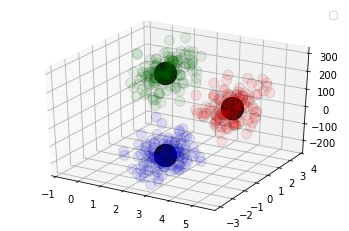

In [15]:
global grafico #figure
grafico = plt.figure().gca(projection='3d')  #new figure
centers = centroids
print(centers)
grafico.scatter(centers[0][0],centers[1][0],(centers[0][0] + 80 * centers[1][0]),color = 'black',s = 500,alpha = 0.9)
grafico.scatter(centers[0][1],centers[1][1],(centers[0][1] +  80 * centers[1][1]),color = 'black',s = 500,alpha = 0.9)
grafico.scatter(centers[0][2],centers[1][2],(centers[0][2] +  80 * centers[1][2]),color = 'black',s = 500,alpha = 0.9)
def scatter_plot(x,y,z,c,m):
    grafico.scatter(x,y,z,color=c, edgecolors='k',s=100, alpha=0.1, marker=m)
    return 
scatter_plot(X[:, 0], X[:, 1], Z,c=color,m='o')
plt.legend()
plt.show()
